# **House Price Prediction with Regression**  

Build a linear regression model to predict house prices based on features like location, square footage, number of bedrooms, and neighborhood information.\
A well-known dataset for this is the Ames Housing dataset.

**Dataset Features** \
\-> *SquareFeet (continuous):* The total square footage of the house.\
\-> *Bedrooms (discrete):* The number of bedrooms in the house.\
\-> *Bathrooms (discrete):* The number of bathrooms in the house. \
\-> *Neighborhood (categorical):* The neighborhood in which the house is located.\
\-> *YearBuilt (continuous):* The year the house was constructed.\
\-> *Price (target variable):* The selling price of the house.

# **Ingestion**

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings


In [2]:
# Suppress all warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [3]:
try:
    df = pd.read_csv("housing_price.csv")
    print("Dataset loaded")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error parsing the file. Please check the file format.")
except Exception as e:
    print("An unexpected error occurred:", str(e))


Dataset loaded


# **Inspection**

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.shape


(50000, 6)

In [6]:
df.columns


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [7]:
df.dtypes


SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [8]:
df.head()


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

In [9]:
df.tail()


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

In [10]:
df.sample()


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
677        2123         2          1        Rural       2007  149038.007188

In [11]:
num_col = df.select_dtypes(include=[np.number]).columns
print(f'Number of Numerical Columns:') 
num_col


Number of Numerical Columns:


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price'], dtype='object')

In [12]:
cat_col = df.select_dtypes(include=['object']).columns
print(f'Number of Categorical Columns:') 
cat_col


Number of Categorical Columns:


Index(['Neighborhood'], dtype='object')

In [13]:
print("Total number of unique values: ", df.nunique().sum())
print(f"Unique values: ")
df.nunique().sort_values(ascending=False)


Total number of unique values:  52082
Unique values: 


Price           50000
SquareFeet       2000
YearBuilt          72
Bedrooms            4
Bathrooms           3
Neighborhood        3
dtype: int64

In [14]:
print('Total number of unique Numerical values:', df.select_dtypes(include=['int','float']).nunique().sum())
print(f"Unique Numerical values: ")
df.select_dtypes(include=['int','float']).nunique().sort_values(ascending=False)


Total number of unique Numerical values: 52079
Unique Numerical values: 


Price         50000
SquareFeet     2000
YearBuilt        72
Bedrooms          4
Bathrooms         3
dtype: int64

In [15]:
print('Total number of unique Categorical values:', df.select_dtypes(include='object').nunique().sum())
print(f"Unique Numerical values: ")
df.select_dtypes(include='object').nunique().sort_values(ascending=False)


Total number of unique Categorical values: 3
Unique Numerical values: 


Neighborhood    3
dtype: int64

**Dataset Size:**

    50,000 entries (rows)
    6 Features (columns): SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, Price

**Data Types:**

    Price: float64
    SquareFeet, Bedrooms, Bathrooms, YearBuilt: int64
    Neighborhood: object (categorical)

**Missing Data:**

    No missing values (all columns have 50,000 non-null entries)

**Unique Values:**

    Price: 50,000 unique values (each entry is unique)
    SquareFeet: 2,000 unique values
    YearBuilt: 72 unique values (reflecting different years of house construction)
    Bedrooms: 4 unique values
    Bathrooms: 3 unique values
    Neighborhood: 3 unique values (likely representing different areas)

**Memory Usage:** 

    Approximately 2.3 MB

In [16]:
df.describe().T


count           mean           std           min            25%  \
SquareFeet  50000.0    2006.374680    575.513241   1000.000000    1513.000000   
Bedrooms    50000.0       3.498700      1.116326      2.000000       3.000000   
Bathrooms   50000.0       1.995420      0.815851      1.000000       1.000000   
YearBuilt   50000.0    1985.404420     20.719377   1950.000000    1967.000000   
Price       50000.0  224827.325151  76141.842966 -36588.165397  169955.860225   

                      50%            75%            max  
SquareFeet    2007.000000    2506.000000    2999.000000  
Bedrooms         3.000000       4.000000       5.000000  
Bathrooms        2.000000       3.000000       3.000000  
YearBuilt     1985.000000    2003.000000    2021.000000  
Price       225052.141166  279373.630052  492195.259972

**Numerical Features:**

*SquareFeet:*

    Count: 50,000 entries
    Mean: 2,006.37 square feet
    Standard Deviation: 575.51 square feet (indicating a moderate variation in house sizes)
    Min: 1,000 square feet
    25th Percentile: 1,513 square feet
    Median (50th Percentile): 2,007 square feet
    75th Percentile: 2,506 square feet
    Max: 2,999 square feet

*Bedrooms:*

    Count: 50,000 entries
    Mean: 3.50 bedrooms (indicating a relatively typical house size of 3-4 bedrooms)
    Standard Deviation: 1.12 bedrooms
    Min: 2 bedrooms
    25th Percentile: 3 bedrooms
    Median (50th Percentile): 3 bedrooms
    75th Percentile: 4 bedrooms
    Max: 5 bedrooms

*Bathrooms:*

    Count: 50,000 entries
    Mean: 1.99 bathrooms
    Standard Deviation: 0.82 bathrooms
    Min: 1 bathroom
    25th Percentile: 1 bathroom
    Median (50th Percentile): 2 bathrooms
    75th Percentile: 3 bathrooms
    Max: 3 bathrooms

*YearBuilt:*

    Count: 50,000 entries
    Mean: 1985.40 (average year of construction)
    Standard Deviation: 20.72 years (houses are built over a range of years)
    Min: 1950
    25th Percentile: 1967
    Median (50th Percentile): 1985
    75th Percentile: 2003
    Max: 2021 (most houses are built in the late 20th and early 21st centuries)

*Price:*

    Count: 50,000 entries
    Mean: 224,827.33 (average house price)
    Standard Deviation: 76,141.84 (indicating a large range in house prices)
    Min: -36,588.17 (likely due to outliers or erroneous data)
    25th Percentile: 169,955.86
    Median (50th Percentile): 225,052.14
    75th Percentile: 279,373.63
    Max: 492,195.26 (highest price in the dataset)

In [17]:
df.describe(include='object').T # Calculates summary statistics


count unique     top   freq
Neighborhood  50000      3  Suburb  16721

**Categorical Feature:**

*Neighborhood:*

    Count: 50,000 entries
    Unique: 3 unique neighborhoods
    Top (most frequent): "Suburb" (the most common neighborhood)
    Freq (frequency): 16,721 houses are located in the "Suburb" neighborhood (about 33.4% of the dataset)

**Summary:**

    SquareFeet: Houses typically range from 1,000 to 3,000 square feet, with a mean size around 2,006 square feet.
    Bedrooms: Most houses have 3 or 4 bedrooms, with a few having 5 bedrooms. The average is around 3.5.
    Bathrooms: Most houses have 1 or 2 bathrooms, with an average of nearly 2.
    YearBuilt: Houses are mostly built between 1950 and 2021, with a concentration in the late 20th century and early 2000s.
    Price: Prices vary widely, with a mean price of $224,827.33, although there are some outliers (negative or very low prices).
    Neighborhood: There are 3 unique neighborhoods, with "Suburb" being the most common, representing about one-third of the houses.

# **Quality**

In [18]:
df.duplicated().sum() # Count duplicate values


0

In [19]:
df.T.duplicated().sum() # Count duplicate columns


0

In [20]:
df.isna().sum().sort_values(ascending=False) # Count missing values per column


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [21]:
print('% of Missing values: ')
missing_values = (df.isna().sum()/len(df)) * 100 
missing_values.sort_values(ascending=False) # % of missing values per column


% of Missing values: 


SquareFeet      0.0
Bedrooms        0.0
Bathrooms       0.0
Neighborhood    0.0
YearBuilt       0.0
Price           0.0
dtype: float64

In [22]:
# Checking the outliners with Z-score
for col in num_col:
    # Z-Score Method
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_z = df[z_scores > 3]

print("Outliers detected using Z-score:")
display(outliers_z.shape)
display(outliers_z)


Outliers detected using Z-score:


(35, 6)

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
1266         1024         2          2        Urban       2006  -24715.242482
2310         1036         4          1       Suburb       1983   -7550.504574
2845         2999         5          2        Urban       1999  461502.014630
3285         2985         5          1        Rural       1961  456959.804367
3357         2928         3          3       Suburb       1962  457902.675442
3630         1235         3          2        Rural       2012  -19871.251146
3784         2901         2          3        Urban       1996  470989.679074
3967         2931         5          1        Rural       1983  453551.125469
4162         1352         5          2       Suburb       1977  -10608.359522
5118         1140         4          1        Urban       2020  -23911.003119
5951         1097         4          3        Rural       1981   -4537.418615
6355         1016         5          2        Rural       1997  -13803.684059
7430         2758         5          2        Rural       1967  492195.259972
8720         1235         3          1        Urban       1952  -24183.000515
9611         1131         3          3        Urban       1959  -13692.026068
11322        2888         2          2        Urban       1953  468470.378004
11991        1213         4          1       Suburb       2020   -4910.415323
17442        1600         2          3        Rural       1989   -8238.884499
17706        1080         5          1        Rural       1955  -28774.998022
20211        1049         3          1        Rural       2005  -18159.685676
20759        1036         2          2        Urban       1957   -4810.724320
21815        2998         3          2        Urban       1995  468493.877841
23650        1024         4          3       Suburb       1953   -4295.932176
25017        2970         4          3        Urban       2005  462557.562958
25459        1106         2          2        Urban       1984   -7177.628532
26930        2995         5          2        Urban       1954  476671.733263
26973        2771         5          2        Urban       1960  467492.827823
33666        1013         5          2        Urban       1960  -36588.165397
35553        1374         4          3        Urban       1996   -4771.570194
36661        2924         5          2        Urban       1986  460583.826082
36929        1078         5          1       Suburb       2015   -6159.039213
40614        2720         2          3       Suburb       2000  455088.643110
44311        2954         5          2        Rural       1960  456955.244541
46610        2957         5          1       Suburb       2001  482577.163405
49924        2830         3          1       Suburb       1983  463977.238482

In [23]:
df.shape


(50000, 6)

In [24]:
# IQR Method
for col in num_col:
    df1=df.copy()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

print("Outliers detected using IQR:")
display(outliers_iqr.shape)
display(outliers_iqr)


Outliers detected using IQR:


(59, 6)

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
1266         1024         2          2        Urban       2006  -24715.242482
2310         1036         4          1       Suburb       1983   -7550.504574
2845         2999         5          2        Urban       1999  461502.014630
3285         2985         5          1        Rural       1961  456959.804367
3357         2928         3          3       Suburb       1962  457902.675442
3630         1235         3          2        Rural       2012  -19871.251146
3784         2901         2          3        Urban       1996  470989.679074
3967         2931         5          1        Rural       1983  453551.125469
4162         1352         5          2       Suburb       1977  -10608.359522
4537         1102         2          1       Suburb       1967    5796.058628
5118         1140         4          1        Urban       2020  -23911.003119
5951         1097         4          3        Rural       1981   -4537.418615
6355         1016         5          2        Rural       1997  -13803.684059
7276         2957         2          3        Rural       1989  452870.618989
7430         2758         5          2        Rural       1967  492195.259972
8687         2883         2          3       Suburb       1978  444972.111219
8720         1235         3          1        Urban       1952  -24183.000515
9611         1131         3          3        Urban       1959  -13692.026068
10597        1177         2          3        Urban       2010    -434.097124
11322        2888         2          2        Urban       1953  468470.378004
11330        2924         2          2        Rural       2000  446341.362223
11991        1213         4          1       Suburb       2020   -4910.415323
12055        2888         5          1       Suburb       2016  451173.373568
16821        2941         4          3        Rural       1993  449315.843749
17216        1013         2          1       Suburb       2018     276.063516
17442        1600         2          3        Rural       1989   -8238.884499
17706        1080         5          1        Rural       1955  -28774.998022
20211        1049         3          1        Rural       2005  -18159.685676
20759        1036         2          2        Urban       1957   -4810.724320
21815        2998         3          2        Urban       1995  468493.877841
23600        2925         3          3       Suburb       1960  447752.277841
23650        1024         4          3       Suburb       1953   -4295.932176
23662        1256         3          1        Rural       1978    3000.859614
25017        2970         4          3        Urban       2005  462557.562958
25459        1106         2          2        Urban       1984   -7177.628532
26930        2995         5          2        Urban       1954  476671.733263
26973        2771         5          2        Urban       1960  467492.827823
27300        1041         4          1        Urban       2002    3926.857020
29044        2205         4          2       Suburb       1967  445343.409387
29827        1173         5          2        Rural       1988    -847.895073
29980        1005         3          3        Urban       1978    2697.849758
30171        1066         3          1        Rural       1964    -602.209099
30955        2667         3          1        Urban       1988  449584.857256
32168        2983         2          1       Suburb       2000  449113.446422
33666        1013         5          2        Urban       1960  -36588.165397
35166        2996         5          1       Suburb       1990  448600.048228
35553        1374         4          3        Urban       1996   -4771.570194
36235        1112         3          1       Suburb       1978    2360.274450
36661        2924         5          2        Urban       1986  460583.826082
36929        1078         5          1       Suburb       2015   -6159.039213
37192        2996         5  

In [25]:
df.shape


(50000, 6)

**Summary of the Data Quality:**

    -> No duplicates and no missing values suggest that the dataset is clean in terms of basic data integrity.
    -> However, there are outliers present in the dataset, which may influence the model's performance.

# **Cleaning**

In [26]:
# Droping Duplicate Rows and columns
df_r = df.drop_duplicates()
df_f= df.T.drop_duplicates()


In [27]:
print(f"After dropping duplicate records: {df_r.shape}")
print(f"After dropping duplicate features: {df_f.shape}")


After dropping duplicate records: (50000, 6)
After dropping duplicate features: (6, 50000)


In [28]:
def drop_outlier_iqr(df, col):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lwr_bnd = Q1 - 1.5 * IQR
  upr_bnd = Q3 + 1.5 * IQR

  # Filter out outliers
  df1 = df[(df[col] >= lwr_bnd) & (df[col] <= upr_bnd)]

  return df1

df_cln = drop_outlier_iqr(df, col)

display(df_cln)


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[49941 rows x 6 columns]

In [29]:
print(f'After removing outliners: {df_cln.shape}')


After removing outliners: (49941, 6)


In [30]:
num_cols = df_cln.select_dtypes(include=[np.number]).columns
cat_cols = df_cln.select_dtypes(include='object').columns


In [31]:
# Fill missing values
for col in num_cols:
    df_cln[col].fillna(df_cln[col].mean(), inplace=True)

for col in cat_cols:
    df_cln[col].fillna(df_cln[col].mode()[0], inplace=True)


In [32]:
print('Checking missing values (after filling):')
df_cln.isna().sum()


Checking missing values (after filling):


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

**Summary of Changes:**

    The dataset now has 49,941 rows after outlier removal, with no missing values and no duplicate records or features.
    The dataset is clean and ready for further analysis or model building, with no need for additional data imputation or cleaning at this point.

# **Analysis**

**Descriptive Analysis**

In [33]:
df_cln.describe().T # Calculates summary statistics


count           mean           std          min            25%  \
SquareFeet  49941.0    2006.363309    575.052125  1000.000000    1513.000000   
Bedrooms    49941.0       3.498628      1.116243     2.000000       3.000000   
Bathrooms   49941.0       1.995495      0.815842     1.000000       1.000000   
YearBuilt   49941.0    1985.406159     20.720412  1950.000000    1967.000000   
Price       49941.0  224822.916361  75762.867779  6124.032174  170000.830619   

                      50%            75%            max  
SquareFeet    2007.000000    2505.000000    2999.000000  
Bedrooms         3.000000       4.000000       5.000000  
Bathrooms        2.000000       3.000000       3.000000  
YearBuilt     1985.000000    2003.000000    2021.000000  
Price       225051.077588  279320.164453  443335.494338

**Numerical Features**

*SquareFeet:*

    Count: 49,941 entries (after removing outliers).
    Mean: 2,006.36 square feet (average house size).
    Standard Deviation: 575.05 square feet, indicating a moderate variation in house sizes.
    Min: 1,000 square feet (smallest house size).
    25th Percentile: 1,513 square feet.
    Median (50th Percentile): 2,007 square feet.
    75th Percentile: 2,505 square feet.
    Max: 2,999 square feet (largest house size).

*Bedrooms:*

    Count: 49,941 entries.
    Mean: 3.50 bedrooms (average number of bedrooms per house).
    Standard Deviation: 1.12 bedrooms, indicating some variation in bedroom count.
    Min: 2 bedrooms.
    25th Percentile: 3 bedrooms.
    Median (50th Percentile): 3 bedrooms.
    75th Percentile: 4 bedrooms.
    Max: 5 bedrooms.

*Bathrooms:*

    Count: 49,941 entries.
    Mean: 1.995 bathrooms (close to 2 bathrooms on average).
    Standard Deviation: 0.82 bathrooms.
    Min: 1 bathroom (smallest number).
    25th Percentile: 1 bathroom.
    Median (50th Percentile): 2 bathrooms.
    75th Percentile: 3 bathrooms.
    Max: 3 bathrooms.
    
*YearBuilt:*

    Count: 49,941 entries.
    Mean: 1,985.41 (average year of house construction).
    Standard Deviation: 20.72 years, indicating houses were built over a span of decades.
    Min: 1950 (oldest houses).
    25th Percentile: 1967.
    Median (50th Percentile): 1985.
    75th Percentile: 2003.
    Max: 2021 (most recent year of house construction).

*Price:*

    Count: 49,941 entries.
    Mean: 224,822.92 (average house price).
    Standard Deviation: 75,762.87, showing substantial variation in house prices.
    Min: 6,124.03 (lowest price, potentially a smaller or lower-quality house).
    25th Percentile: 170,000.83.
    Median (50th Percentile): 225,051.08.
    75th Percentile: 279,320.16.
    Max: 443,335.49 (highest price in the dataset).

In [34]:
df_cln.describe(include='object').T #Calculates categorical statistics


count unique     top   freq
Neighborhood  49941      3  Suburb  16700

**Categorical Feature**

*Neighborhood*

    Count: 49,941 entries.
    Unique Values: 3 unique neighborhoods.
    Top Value: "Suburb" (the most common neighborhood).
    Frequency of "Suburb": 16,700 houses are located in the "Suburb" neighborhood, making it the most frequent.

In [35]:
df_cln.describe(include='all').T #Calculates categorical statistics


count unique     top   freq           mean           std  \
SquareFeet    49941.0    NaN     NaN    NaN    2006.363309    575.052125   
Bedrooms      49941.0    NaN     NaN    NaN       3.498628      1.116243   
Bathrooms     49941.0    NaN     NaN    NaN       1.995495      0.815842   
Neighborhood    49941      3  Suburb  16700            NaN           NaN   
YearBuilt     49941.0    NaN     NaN    NaN    1985.406159     20.720412   
Price         49941.0    NaN     NaN    NaN  224822.916361  75762.867779   

                      min            25%            50%            75%  \
SquareFeet         1000.0         1513.0         2007.0         2505.0   
Bedrooms              2.0            3.0            3.0            4.0   
Bathrooms             1.0            1.0            2.0            3.0   
Neighborhood          NaN            NaN            NaN            NaN   
YearBuilt          1950.0         1967.0         1985.0         2003.0   
Price         6124.032174  170000.830619  225051.077588  279320.164453   

                        max  
SquareFeet           2999.0  
Bedrooms                5.0  
Bathrooms               3.0  
Neighborhood            NaN  
YearBuilt            2021.0  
Price         443335.494338

**Insights:**

    House Size (SquareFeet): The majority of houses are in the range of 1,000 to 3,000 square feet, with the average house size being approximately 2006 square feet.
    Bedrooms and Bathrooms: Most houses have 2 to 5 bedrooms and 1 to 3 bathrooms, with an average of 3.5 bedrooms and nearly 2 bathrooms per house.
    YearBuilt: Houses span a broad range of construction years, from 1950 to 2021, with a concentration around the mid-1980s to early 2000s.
    Price: House prices range significantly, with an average price of around $224,823, but with some extreme variation (standard deviation of over $75,000). The most frequent price values fall within the $170,000 to $280,000 range, but some higher-priced houses are priced over $440,000.
    Neighborhood: The dataset includes three neighborhoods, with "Suburb" being the most frequent, accounting for about one-third of the houses.

**Uni-variate**

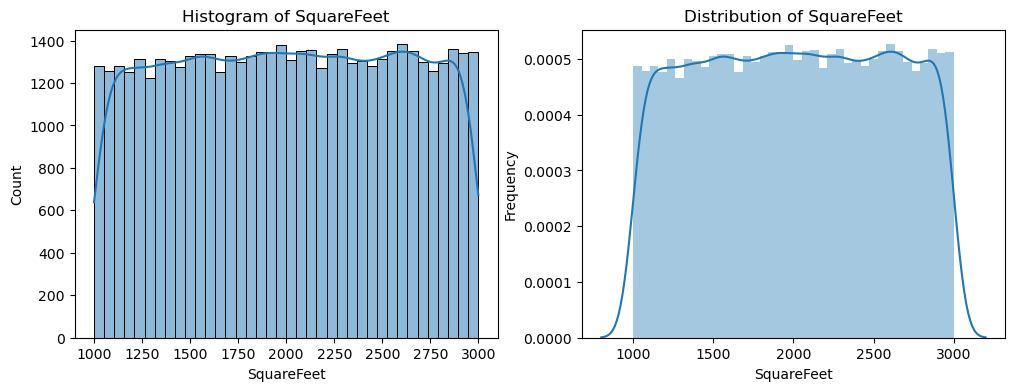

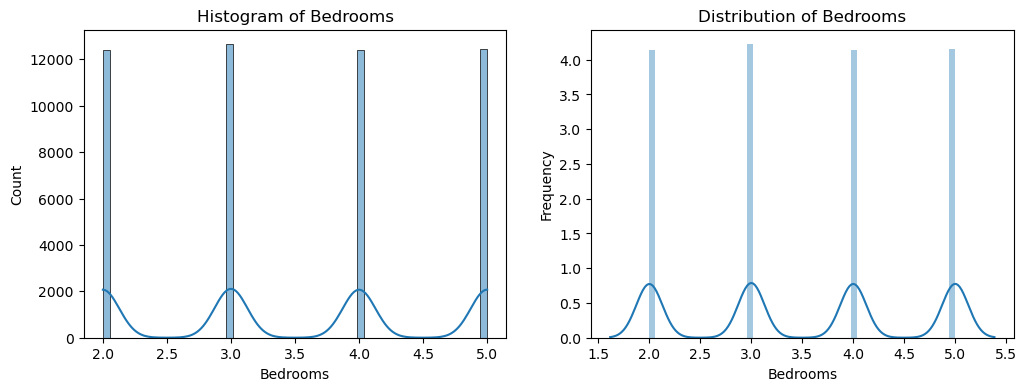

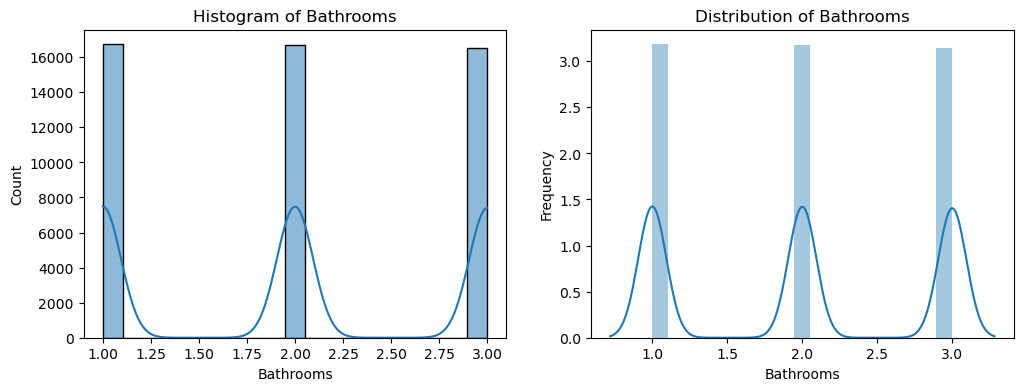

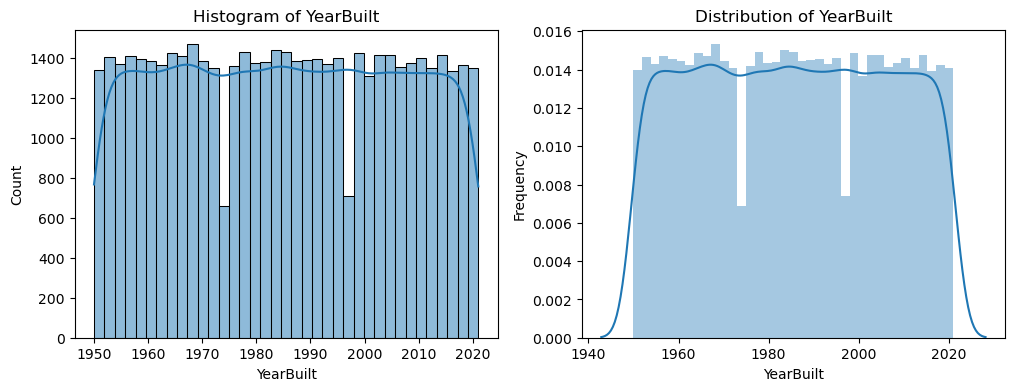

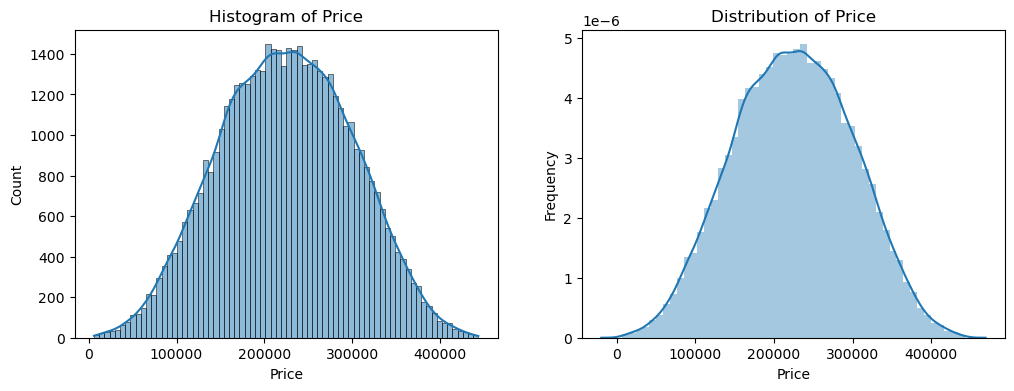

In [36]:
# for Numerical columns
for col in num_cols:
    fig,axes = plt.subplots(1,2, figsize=(12, 4))
    
    # Histograms and KDE plots
    sns.histplot(df_cln[col], kde=True, multiple='dodge', hue=None, ax=axes[0]) 
    axes[0].set_title(f"Histogram of {col}")

    #Distribution plots
    sns.distplot(df_cln[col], ax=axes[1])
    axes[1].set_title(f"Distribution of {col}")
    
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


*SquareFeet (House Size):*

The data for SquareFeet is normally distributed with a mean around 1,750 square feet.
Most houses have square footage in the range of 1,500 to 2,000 square feet, indicating that the majority of homes are of average size.

*Bedrooms:*

The data on the number of bedrooms is not normally distributed. It has a multimodal distribution with peaks at 2, 3, 4, and 5 bedrooms.
This suggests that houses in this dataset are grouped into distinct categories based on the number of bedrooms, such as smaller homes (2 bedrooms), typical family homes (3 or 4 bedrooms), and larger homes (5 bedrooms).

*Bathrooms:*

The data for the number of bathrooms is also not normally distributed. It exhibits a multimodal distribution with peaks at 1, 2, and 3 bathrooms.
This suggests that houses are predominantly found in specific bathroom categories, with many homes having 1 or 2 bathrooms, and fewer homes having 3 bathrooms.

*YearBuilt (Year of Construction):*

The data for YearBuilt is not normally distributed. Instead, it shows a multimodal distribution with peaks around the years 1960, 1980, 1990, and 2000.
This indicates that there are distinct periods when large numbers of houses were built, likely reflecting trends in housing development during these years. It suggests that the housing market saw booms or increased construction activity during these times.

*Price:*

The data on house prices is not normally distributed. It exhibits a right-skewed distribution, meaning the majority of houses are priced lower, while there are a few very expensive houses that cause the tail on the right side of the distribution.
This suggests that the market has many homes in the lower price range, but a smaller number of high-end or luxury homes push the prices upward.

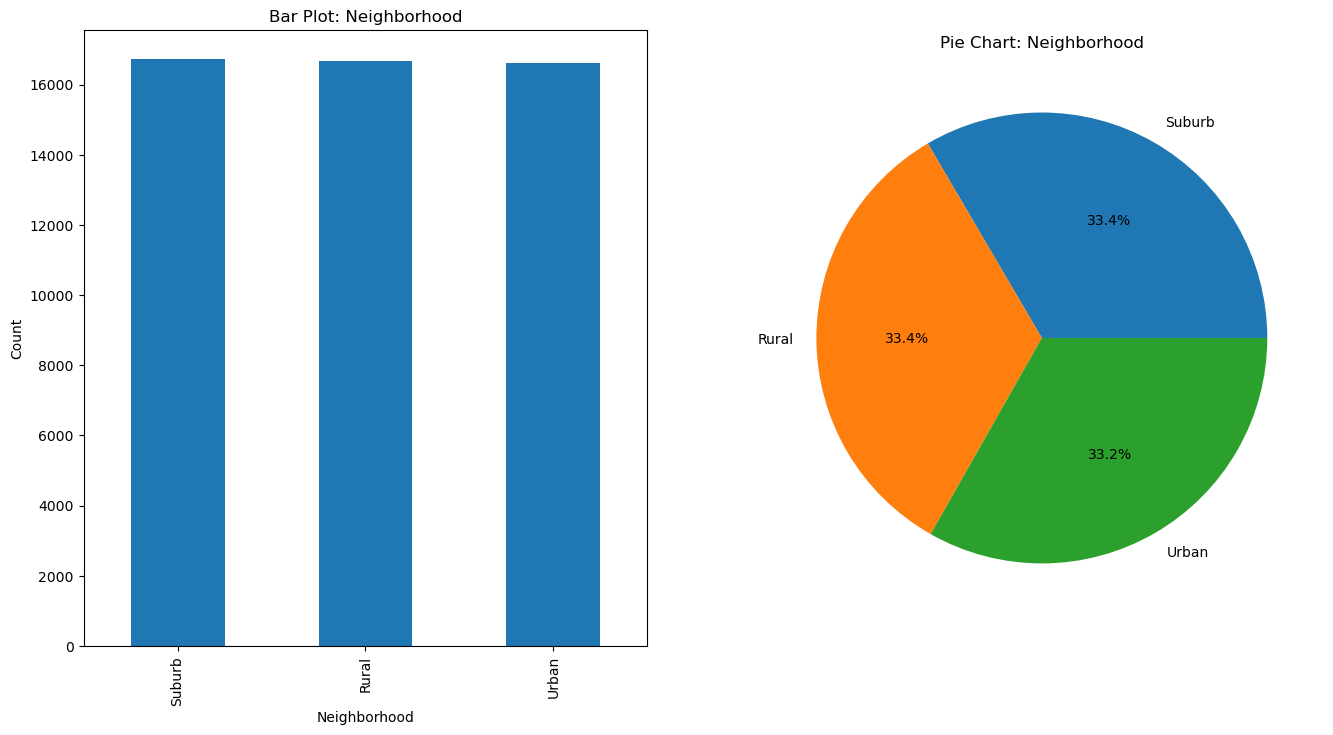

In [37]:
for col in cat_cols:
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Bar plot
    df[col].value_counts().plot(kind='bar', ax=axs[0])
    axs[0].set_title(f'Bar Plot: {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Count')

    # Pie chart
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
    axs[1].set_title(f'Pie Chart: {col}')
    axs[1].set_ylabel('')

    plt.show()


*Neighborhood:*

    The data on Neighborhood is evenly distributed across the three categories: Suburb, Rural, and Urban.
    Each category represents approximately one-third of the total number of houses in the dataset. This suggests a balanced distribution of homes across these three types of neighborhoods

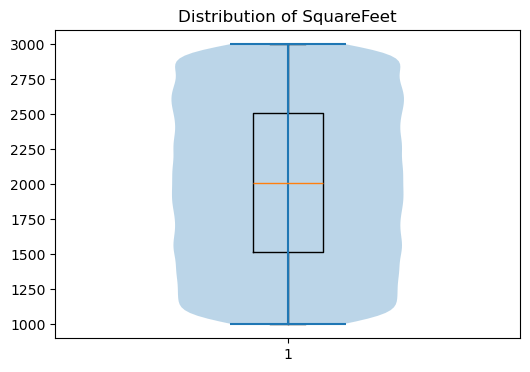

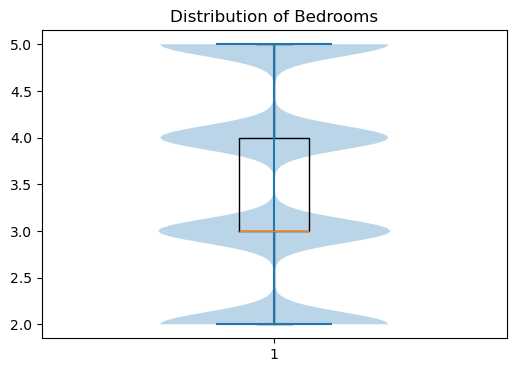

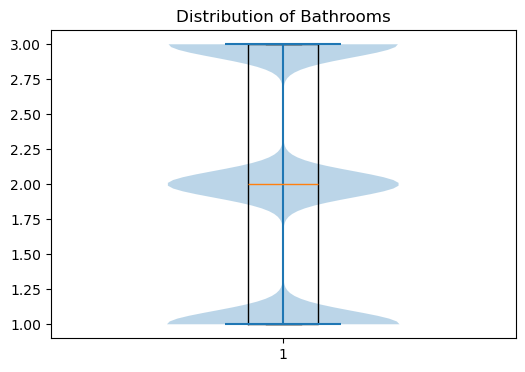

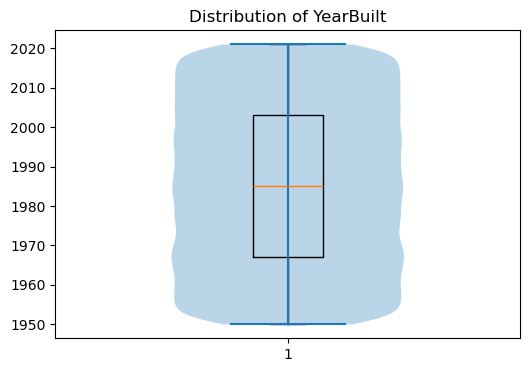

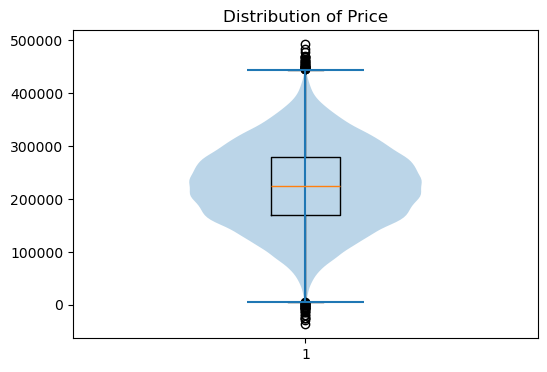

In [38]:
#Box & violin plots for detecting outliners independent columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col])
    plt.violinplot(df_cln[col])
    plt.title(f"Distribution of {col}")
    plt.show()


*Square Feet:*

    The violin plot shows a symmetric distribution, meaning most houses have similar square footage.
    The box plot confirms this with the median in the center of the box and no significant outliers.

*Bedrooms and Bathrooms:*

    Both the violin and box plots show multimodal distributions, indicating that certain numbers of bedrooms and bathrooms (e.g., 2, 3, and 4) are more common.

*Year Built:*

    The violin plot shows peaks at specific years, indicating increased construction during those periods (e.g., around 1960, 1980, and 2000).
    The box plot highlights the range of years and shows the spread of house construction.

*Price:*

    The violin plot reveals a right-skewed distribution, meaning most houses are priced lower, with a few very expensive ones causing a long tail on the higher end.
    The box plot confirms this skewness and highlights outliers (extremely high-priced houses).

**Summary of Insights**

    SquareFeet shows a typical, normal distribution around a common house size (1,500-2,000 sq. ft.).
    Bedrooms and Bathrooms have distinct clusters, indicating homes with specific bedroom/bathroom counts (e.g., 2, 3, or 4 bedrooms).
    YearBuilt shows trends in housing construction over specific decades, with periods of heavy building around 1960, 1980, 1990, and 2000.
    Price is right-skewed, showing that while most homes are relatively affordable, there are fewer, much more expensive homes, creating a long tail on the higher end.
    The Suburb, Rural, and Urban neighborhoods each have roughly the same number of houses, making the Neighborhood feature fairly balanced.

**Bi-variate**

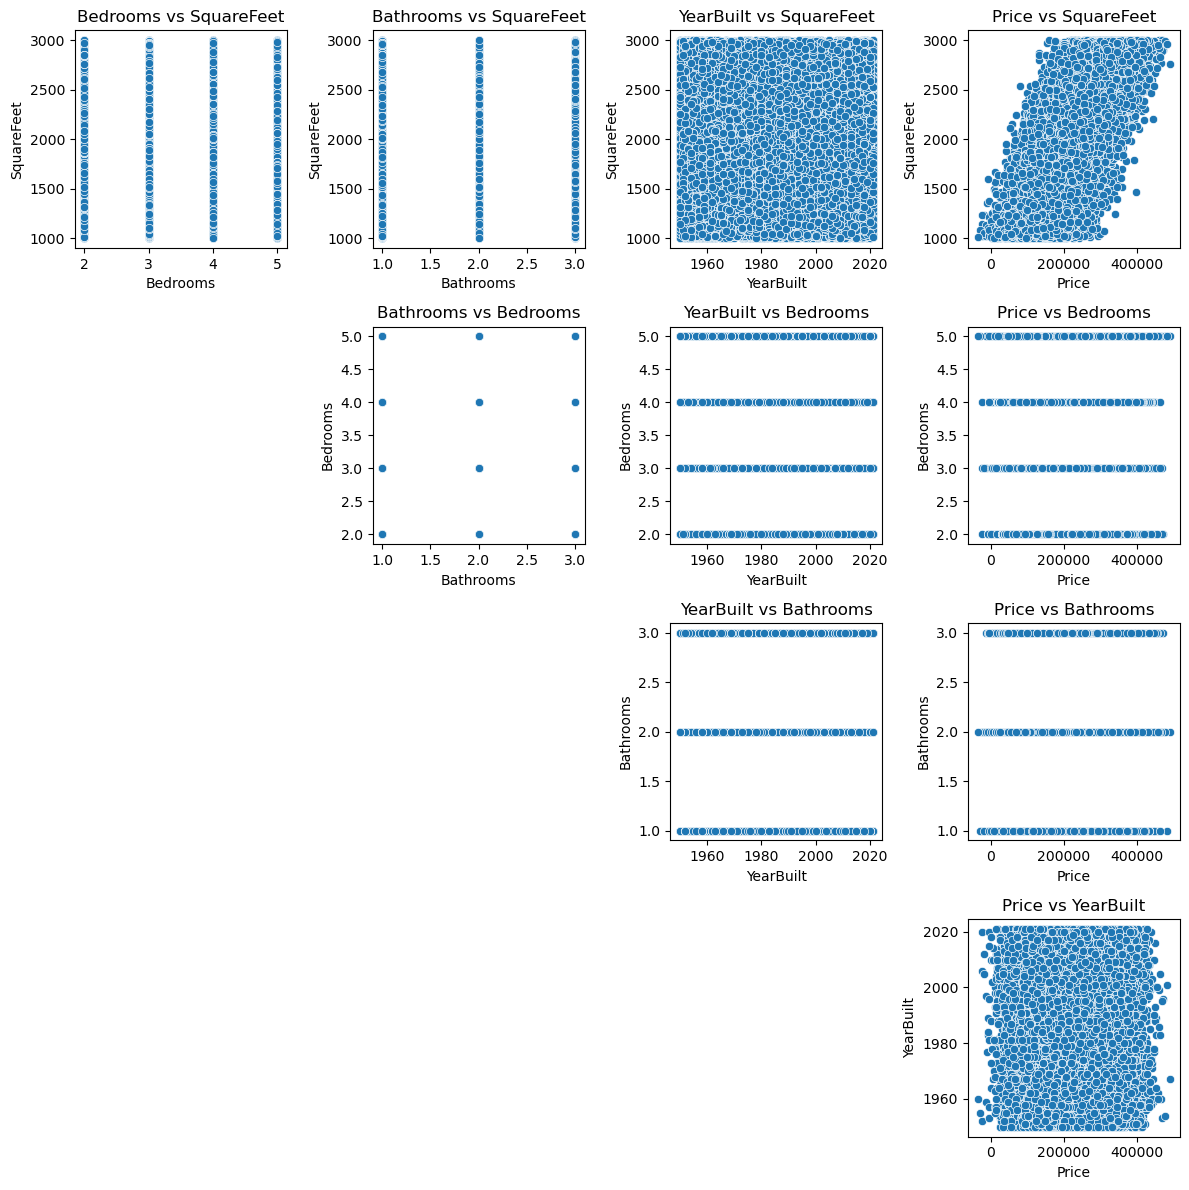

In [39]:
# Create scatter plots for all pairs of continuous variables
plt.figure(figsize=(12, 12))
for j, col1 in enumerate(num_cols):
    for i, col2 in enumerate(num_cols):
        if i < j:  # Avoid duplicate plots and self comparisons (e.g., Price vs Price)
            plt.subplot(len(num_cols)-1, len(num_cols)-1, i*(len(num_cols)-1) + j)
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()


*Bedrooms vs SquareFeet:*

    Positive correlation: As the number of bedrooms increases, the square footage of the house also tends to increase. Larger houses with more bedrooms are generally built with more space.
    
*Bathrooms vs SquareFeet:*

    Positive correlation: Similarly, there is a positive relationship between the number of bathrooms and the square footage. Houses with more bathrooms tend to be larger in size.

*YearBuilt vs SquareFeet:*

    No clear trend: This scatter plot does not show a distinct linear relationship between the year built and the square footage of houses. However, there might be clustering of houses built in specific years with similar square footage, though the overall pattern is weak.
    
*Price vs SquareFeet:*

    Strong positive correlation: There is a clear positive relationship between square footage and price. Larger homes, as measured by square footage, are generally more expensive.

*Bathrooms vs Bedrooms:*

    Positive correlation: This plot shows that houses with more bedrooms tend to also have more bathrooms. Larger homes often come with more living spaces, including more bathrooms.

*YearBuilt vs Bedrooms:*

    No clear trend: The number of bedrooms does not seem to be related to the year the house was built. There is no strong or noticeable pattern in the distribution of bedroom counts across years of construction.

*Price vs Bedrooms:*

    Positive correlation: Houses with more bedrooms generally have a higher price. More bedrooms often indicate a larger, more valuable home.

*YearBuilt vs Bathrooms:*

    No clear trend: There is no significant correlation between the year built and the number of bathrooms in the house. The year a house was built does not seem to strongly influence the number of bathrooms.

*Price vs Bathrooms:*

    Positive correlation: There is a clear positive correlation between the number of bathrooms and the price of a house. Houses with more bathrooms are typically more expensive, as they likely have more space and amenities.

*Price vs YearBuilt:*

    No clear trend: This plot does not show a strong relationship between price and the year built. Houses built in different years do not consistently have higher or lower prices, indicating that other factors (e.g., size, location) might have a more significant impact on price than the construction year.

**Summary**

    Size and Price: There is a consistent positive relationship between house size (measured by square footage) and price. Larger homes tend to have more bedrooms, bathrooms, and higher prices.
    Bedrooms and Bathrooms: Homes with more bedrooms generally have more bathrooms, and both bedroom and bathroom counts positively correlate with price.
    Year Built: The year a house was built shows little relationship with the number of bedrooms, bathrooms, or price, though some clustering in terms of square footage was noted. The construction year alone does not strongly determine the price or features of the house.

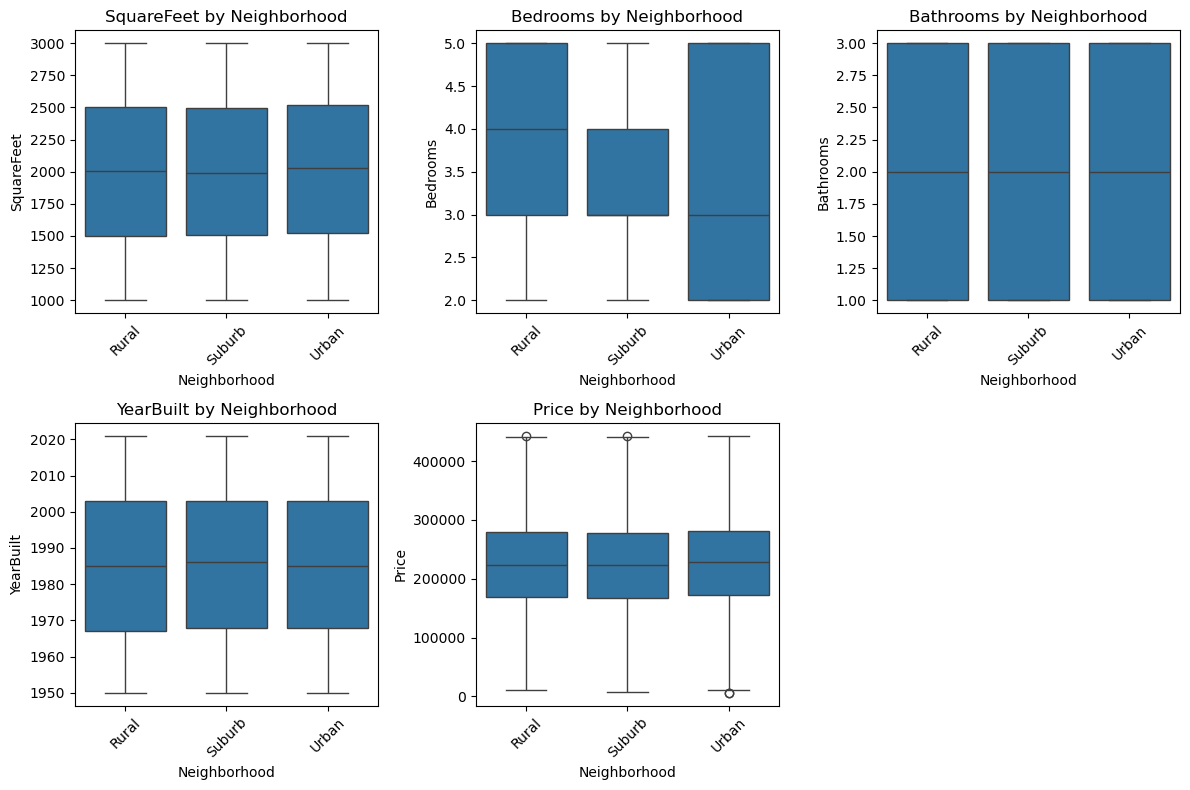

In [40]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_cln['Neighborhood'], y=df[col])
    plt.title(f'{col} by Neighborhood')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


**Summary**\
House size (SquareFeet) and other features such as bedrooms and bathrooms appear to be distributed similarly across all neighborhoods, with only a slight variation in the Urban neighborhood.\
Urban neighborhoods tend to have larger variations in house prices, square footage, number of bedrooms, bathrooms, and construction years compared to Rural and Suburban neighborhoods.\
Price is the most distinct feature across neighborhoods, with Urban houses being significantly more expensive than those in Rural or Suburban areas.\
The presence of outliers in the Urban neighborhood suggests a few properties with extreme values in terms of size and price, contributing to the wider range seen in that area.

In [41]:
# Group by 'Neighborhood' and compute mean for continuous columns
gro_stat = df.groupby('Neighborhood')[num_cols].mean()
# Print the grouped statistics
display(gro_stat)


SquareFeet  Bedrooms  Bathrooms    YearBuilt          Price
Neighborhood                                                              
Rural         2001.621132  3.506836   1.991185  1985.353262  224096.126040
Suburb        2000.151127  3.493930   2.000658  1985.515280  223234.189857
Urban         2017.416913  3.495332   1.994399  1985.344155  227166.197139

**Summary:**

    There is little variation in house size, number of bedrooms, and bathrooms across the three neighborhoods (Rural, Suburb, Urban).
    All areas have homes built around the same time (mid-1980s).
    The Urban neighborhood has slightly larger houses and higher prices on average compared to Rural and Suburb neighborhoods, though the differences are not dramatic.

**Multi variate**

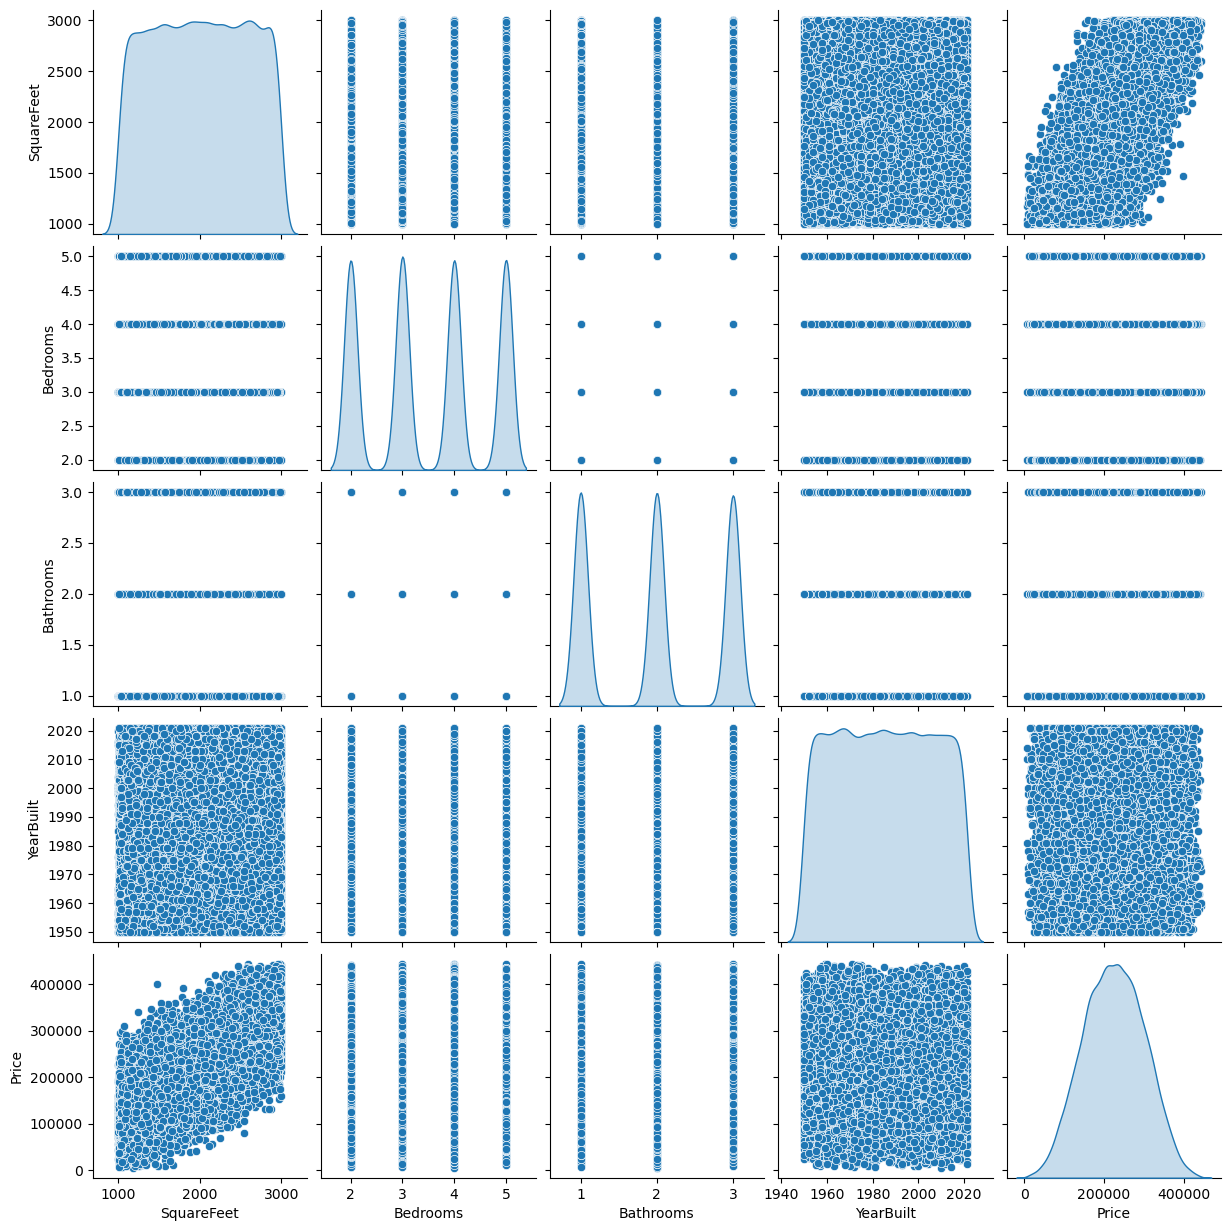

In [42]:
# Pair plot of dataset
sns.pairplot(df_cln, hue=None, diag_kind='kde')
plt.show()


**Summary:**

Most houses tend to be smaller, with common configurations of 3-4 bedrooms and 1-3 bathrooms.\
There are peaks in certain construction years, likely indicating periods of housing booms.\
House prices are strongly correlated with square footage, bedrooms, and bathrooms, but there is a greater spread in pricing, with a few very expensive properties.\
The relationship between year built and other features like square footage, bedrooms, and bathrooms does not show any clear pattern, suggesting that factors other than the construction year influence these features more significantly.

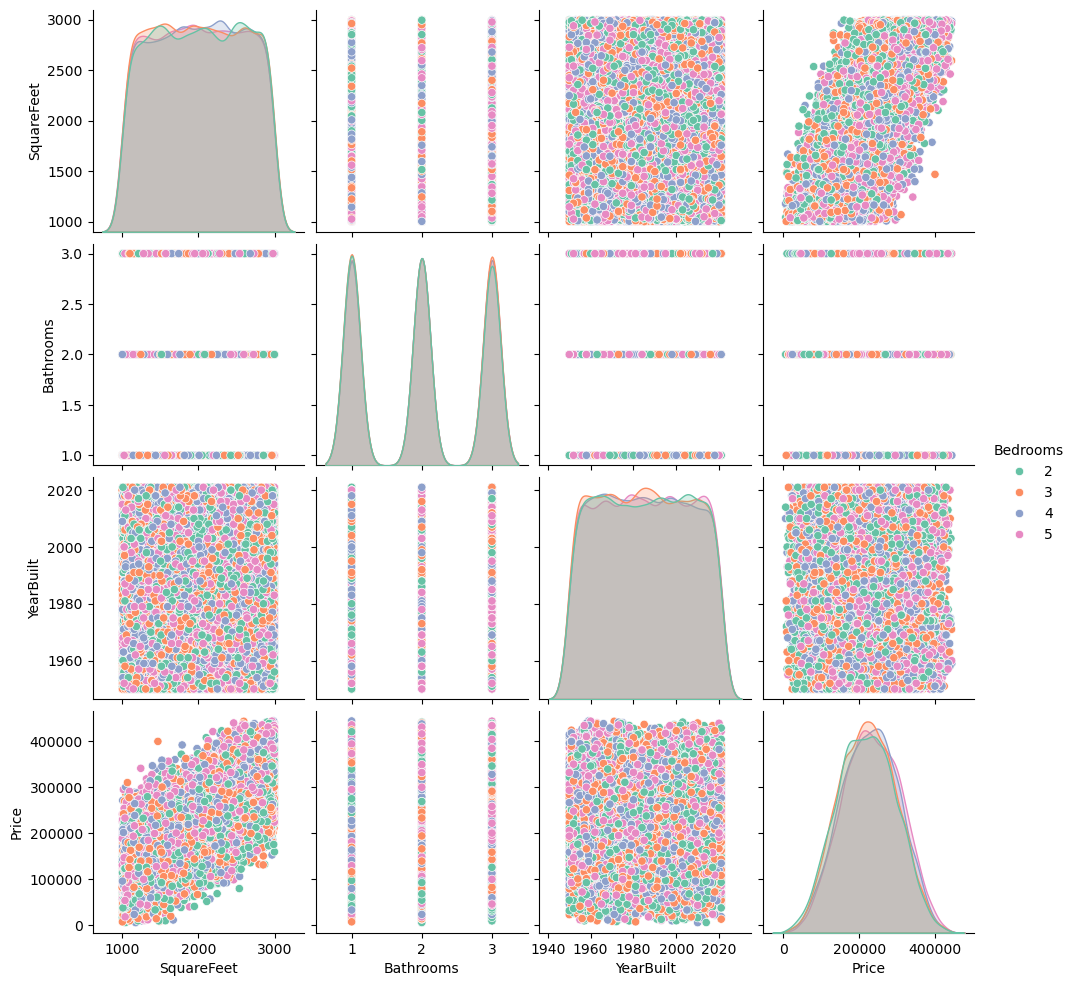

In [43]:
# Pair plot of dataset
sns.pairplot(df_cln, hue='Bedrooms', diag_kind='kde', palette = 'Set2')
plt.show()


**Impact of Bedrooms on Relationships:**

SquareFeet vs. Bedrooms: Houses with more bedrooms generally have larger square footage. This is evident as points with more bedrooms are clustered toward the upper-right part of the plot, indicating larger homes.

Bathrooms vs. Bedrooms: Similarly, houses with more bedrooms tend to have more bathrooms. This pattern holds across the dataset, as seen in the scatter plot, where houses with higher bedroom counts are clustered with higher bathroom counts.

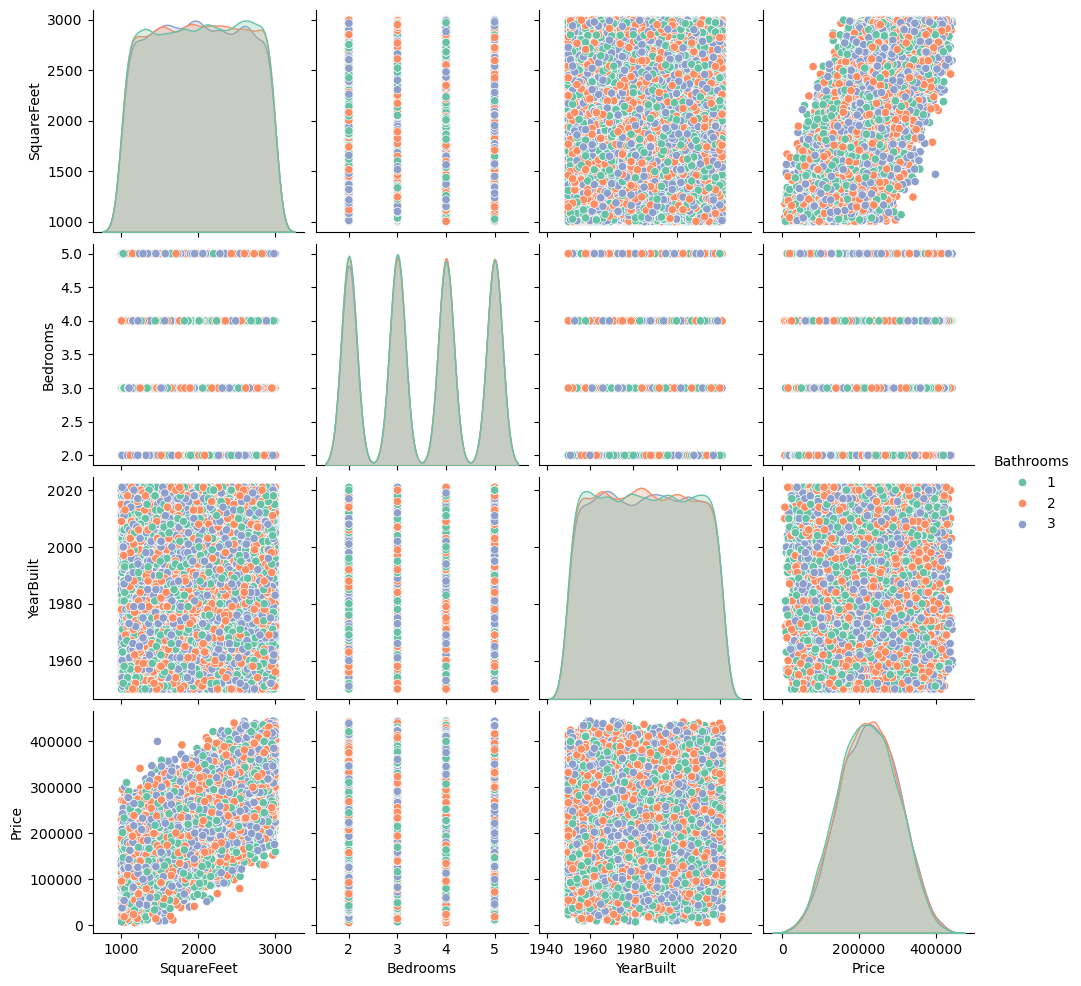

In [44]:
# Pair plot of dataset
sns.pairplot(df_cln, hue='Bathrooms', diag_kind='kde', palette = 'Set2')
plt.show()


**Impact of Bathrooms on Relationships**

SquareFeet vs. Bathrooms: When looking at the relationship between square footage and bathrooms, houses with more bathrooms tend to have larger square footage. This is visible in the scatter plot, where points corresponding to homes with more bathrooms cluster in the upper-right corner, indicating that homes with more bathrooms are generally larger.

Bedrooms vs. Bathrooms: Similarly, houses with more bathrooms tend to have more bedrooms. The scatter plot for this relationship shows a clear trend where homes with a higher number of bathrooms are typically also those with more bedrooms.

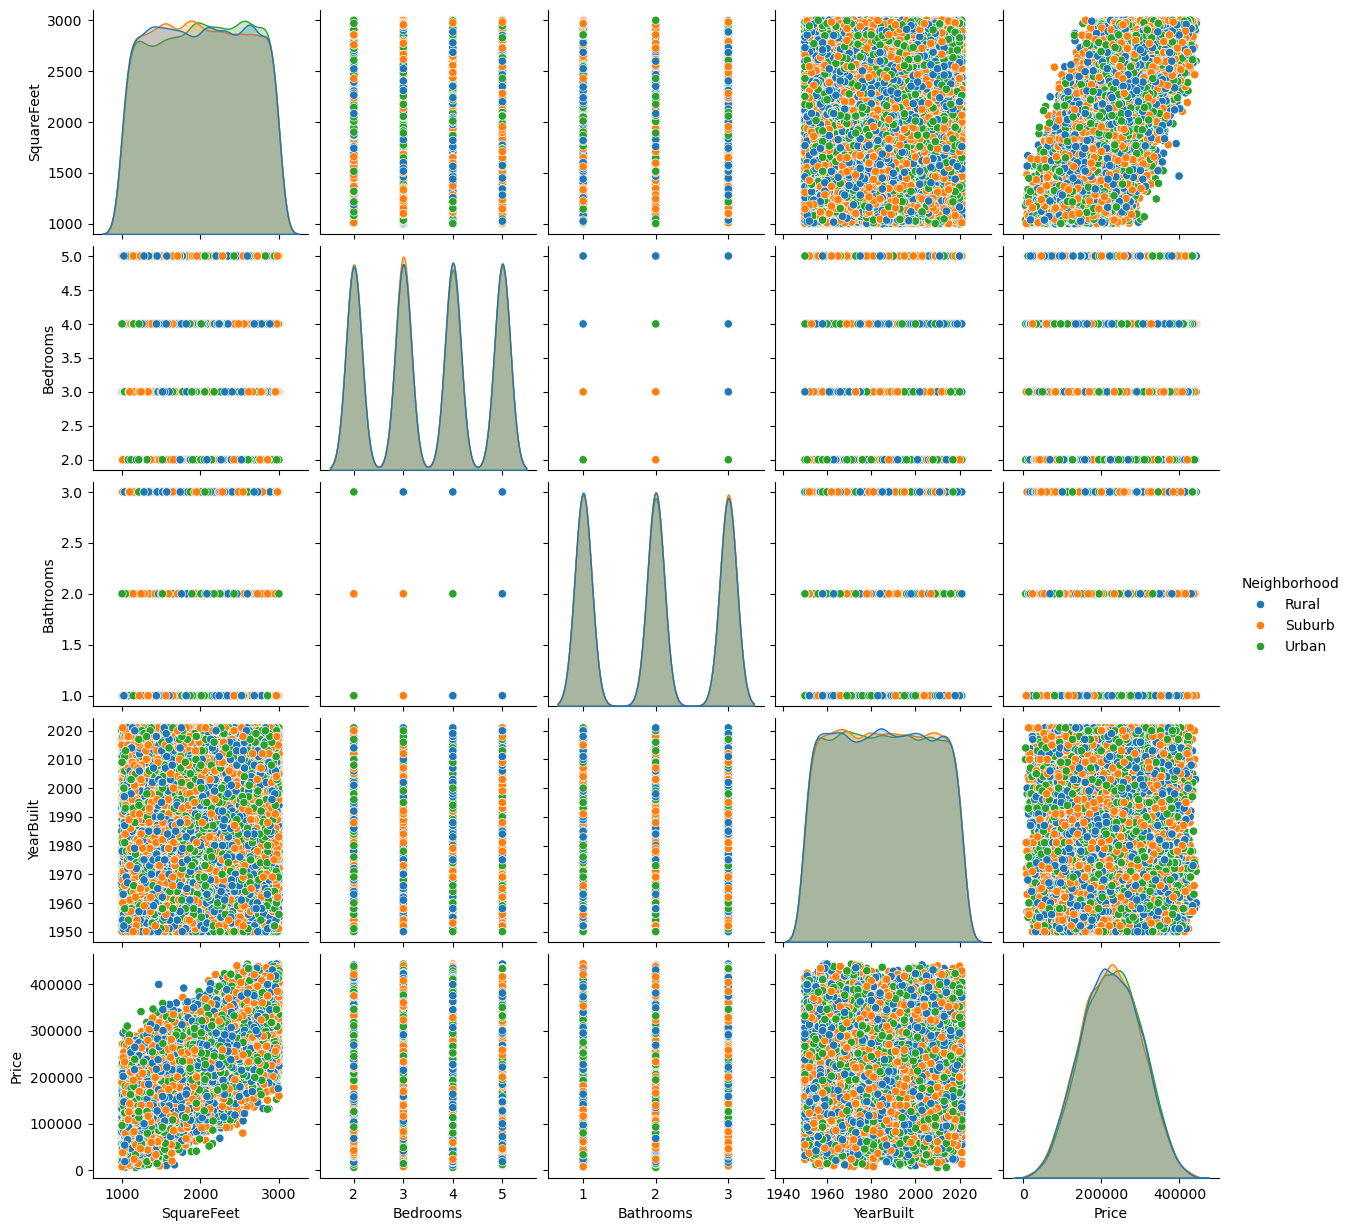

In [45]:
# Pair plot of dataset
sns.pairplot(df_cln, hue='Neighborhood', diag_kind='kde')
plt.show()


**Impact of Neighborhood on Relationships:**

Urban Neighborhoods: Homes in urban neighborhoods tend to have larger square footage, more bedrooms, and more bathrooms, as indicated by the clustering of points in the upper-right corner of scatter plots for these variables.

Price Differences: Urban neighborhoods likely have higher average house prices compared to other neighborhoods, suggesting that larger homes in urban areas tend to come with higher prices.

**Summary:**

The square footage and price of homes show right-skewed distributions, meaning most homes are smaller and cheaper, but a few large or expensive homes affect the overall distribution.\
Bedrooms and bathrooms are multimodal, with certain configurations (e.g., 3 or 4 bedrooms, 2 bathrooms) being more common.\
Urban neighborhoods typically feature larger homes with more bedrooms, bathrooms, and higher prices compared to other types of neighborhoods like Suburban or Rural areas.

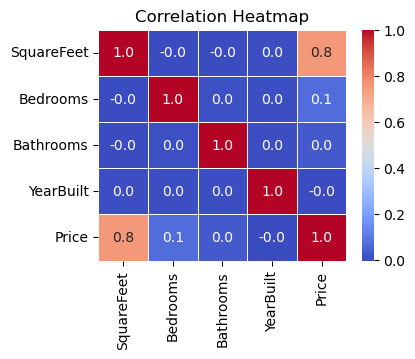

In [46]:
# Compute correlation matrix
corr = df_cln.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Summary of Correlation Analysis:**

1. **Positive Correlations**:
   - *SquareFeet and Price*: A strong positive correlation (0.8), indicating that as the square footage of a house increases, its price tends to increase.
   - *Bedrooms and Price*: A weak positive correlation (0.1), suggesting that houses with more bedrooms may be slightly more expensive, but the relationship is not strong.
   - *Bathrooms and Price*: A very weak negative correlation (-0.0), indicating that the number of bathrooms has a negligible relationship with the house price.

2. **Negative Correlations**:
   - No significant negative correlations are observed between any variables.

3. **No Correlation**:
   - The correlation between **earBuilt* and other variables (SquareFeet, Bedrooms, Bathrooms, Price) is close to zero, suggesting that the year a house was built does not significantly affect the other variables.

# **Feature Engineering**

**Creation**

In [47]:
num_cols.shape


(5,)

In [48]:
num_cols


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price'], dtype='object')

In [49]:
display(df_cln[num_cols])


SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price
0            2126         4          1       1969  215355.283618
1            2459         3          2       1980  195014.221626
2            1860         2          1       1970  306891.012076
3            2294         2          1       1996  206786.787153
4            2130         5          2       2001  272436.239065
...           ...       ...        ...        ...            ...
49995        1282         5          3       1975  100080.865895
49996        2854         2          2       1988  374507.656727
49997        2979         5          3       1962  384110.555590
49998        2596         5          2       1984  380512.685957
49999        1572         5          3       2011  221618.583218

[49941 rows x 5 columns]

In [50]:
cat_cols.shape


(1,)

In [51]:
cat_cols


Index(['Neighborhood'], dtype='object')

In [52]:
display(df_cln[cat_cols])


Neighborhood
0            Rural
1            Rural
2           Suburb
3            Urban
4           Suburb
...            ...
49995        Rural
49996       Suburb
49997       Suburb
49998        Rural
49999        Rural

[49941 rows x 1 columns]

**Transformation**

In [53]:
from sklearn.preprocessing import OrdinalEncoder


In [54]:
# Define categorical columns
ordi_cols = ['Neighborhood']

# Ordinal Encoding for ordinal columns
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(df_cln[ordi_cols])
df_cln_ordi = pd.DataFrame(encoded_ordinal, columns=ordi_cols)


In [55]:
df_cln_ordi


Neighborhood
0               0.0
1               0.0
2               1.0
3               2.0
4               1.0
...             ...
49936           0.0
49937           1.0
49938           1.0
49939           0.0
49940           0.0

[49941 rows x 1 columns]

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the numeric columns
scaler = StandardScaler()
df_cln_st = df_cln[num_cols].copy()
df_cln_st[num_cols] = scaler.fit_transform(df_cln[num_cols])

# Normalize the numeric columns
scaler = MinMaxScaler()
df_cln_nm = df_cln[num_cols].copy()
df_cln_nm[num_cols] = scaler.fit_transform(df_cln[num_cols])


In [57]:
df_cln_st[num_cols]


SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
0        0.208047  0.449164  -1.220217  -0.791795 -0.124965
1        0.787131 -0.446707   0.005522  -0.260912 -0.393451
2       -0.254524 -1.342578  -1.220217  -0.743533  1.083234
3        0.500197 -1.342578  -1.220217   0.511281 -0.238063
4        0.215003  1.345036   0.005522   0.752591  0.628458
...           ...       ...        ...        ...       ...
49995   -1.259661  1.345036   1.231262  -0.502223 -1.646497
49996    1.474032 -1.342578   0.005522   0.125184  1.975720
49997    1.691406  1.345036   1.231262  -1.129630  2.102471
49998    1.025372  1.345036   0.005522  -0.067864  2.054982
49999   -0.755354  1.345036   1.231262   1.235212 -0.042295

[49941 rows x 5 columns]

In [58]:
df_cln_nm[num_cols]


SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
0        0.563282  0.666667        0.0   0.267606  0.478558
1        0.729865  0.333333        0.5   0.422535  0.432034
2        0.430215  0.000000        0.0   0.281690  0.687921
3        0.647324  0.000000        0.0   0.647887  0.458960
4        0.565283  1.000000        0.5   0.718310  0.609115
...           ...       ...        ...        ...       ...
49995    0.141071  1.000000        1.0   0.352113  0.214900
49996    0.927464  0.000000        0.5   0.535211  0.842575
49997    0.989995  1.000000        1.0   0.169014  0.864539
49998    0.798399  1.000000        0.5   0.478873  0.856310
49999    0.286143  1.000000        1.0   0.859155  0.492884

[49941 rows x 5 columns]

# **Train test split**

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
# Features
X = df_cln_nm.drop('Price', axis=1)
# Target variable
y = df_cln_nm['Price']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((39952, 4), (9989, 4), (39952,), (9989,))

In [62]:
X_train


SquareFeet  Bedrooms  Bathrooms  YearBuilt
1        0.729865  0.333333        0.5   0.422535
36291    0.106553  0.333333        0.0   0.859155
32332    0.987494  1.000000        1.0   0.309859
7663     0.769385  0.333333        1.0   0.830986
4226     0.941471  0.333333        0.5   0.507042
...           ...       ...        ...        ...
11303    0.030515  1.000000        0.5   0.507042
44788    0.161581  0.000000        0.0   0.239437
38209    0.291146  1.000000        1.0   0.112676
860      0.594297  0.333333        0.0   0.408451
15818    0.165083  0.666667        1.0   0.042254

[39952 rows x 4 columns]

In [63]:
 X_test


SquareFeet  Bedrooms  Bathrooms  YearBuilt
40554    0.685843  0.666667        0.0   0.507042
25119    0.410205  1.000000        0.0   0.380282
25049    0.427214  0.000000        0.0   0.394366
29212    0.287644  0.666667        0.0   0.718310
14188    0.070035  0.666667        0.0   0.788732
...           ...       ...        ...        ...
43683    0.904452  0.000000        0.0   0.535211
31522    0.568284  0.333333        1.0   0.929577
14791    0.521261  1.000000        0.5   1.000000
26847    0.082041  1.000000        1.0   0.070423
33051    0.222111  0.333333        0.0   1.000000

[9989 rows x 4 columns]

In [64]:
y_train


1        0.432034
36291    0.282485
32332    0.677463
7663     0.538573
4226     0.701361
           ...   
11303    0.355340
44788    0.561641
38209    0.399092
860      0.288854
15818    0.390236
Name: Price, Length: 39952, dtype: float64

In [65]:
y_test


40554    0.546099
25119    0.523316
25049    0.449869
29212    0.482197
14188    0.225983
           ...   
43683    0.896262
31522    0.460702
14791    0.454631
26847    0.219562
33051    0.459236
Name: Price, Length: 9989, dtype: float64

**Shape of the Data:**

*Training Data:*

    39,952 samples
    4 features

*Testing Data:*

    9,989 samples
    4 features

*Target Variable:*

    39,952 target values for training
    9,989 target values for testing

# **Machine Learning**

**Model Selection**

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


Linear Regression: Simple and interpretable, but might not capture complex relationships.\
Ridge and Lasso Regression: Good for dealing with multicollinearity and overfitting.\
Decision Trees: Can capture complex patterns but are prone to overfitting.\
Random Forest and Gradient Boosting: Powerful ensemble methods that often perform well, but can be computationally expensive.\
SVR: Can handle non-linear relationships but can be computationally intensive and sensitive to hyperparameter tuning.

In [67]:
# Define models
models = {
    "Linear Regression": LinearRegression(), 
    "Ridge Regression": Ridge(alpha=1.0),  # Example alpha value, adjust as needed
    "Lasso Regression": Lasso(alpha=0.1),  # Example alpha value, adjust as needed
    "Decision Tree": DecisionTreeRegressor(max_depth=5),  # Example max_depth value
    "Random Forest": RandomForestRegressor(n_estimators=100),  # Example n_estimators value
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),  # Example n_estimators value
    "Support Vector Regression": SVR(kernel='rbf')  # Example kernel value
}


Linear Regression
Model: A simple linear regression model that fits a linear equation to the data.
Parameters: None (default parameters are used)

Ridge Regression
Model: A linear regression model with L2 regularization. This can help prevent overfitting by penalizing large coefficients.
Parameters:
alpha: Regularization strength. Higher values lead to stronger regularization.

Lasso Regression
Model: A linear regression model with L1 regularization. This can lead to feature selection by setting some coefficients to zero.
Parameters:
alpha: Regularization strength. Higher values lead to stronger regularization and more feature selection.

Decision Tree Regressor
Model: A decision tree model, which makes decisions based on a series of if-else conditions.
Parameters:
max_depth: Maximum depth of the tree. Deeper trees can potentially capture more complex patterns but are more prone to overfitting.

Random Forest Regressor
Model: An ensemble method that combines multiple decision trees.
Parameters:
n_estimators: Number of trees in the forest. More trees generally lead to better performance but can be computationally expensive.

Gradient Boosting Regressor
Model: An ensemble method that builds models sequentially, with each model correcting the errors of the previous ones.
Parameters:
n_estimators: Number of trees in the ensemble.

Support Vector Regression (SVR)
Model: A non-linear regression model that uses kernel functions to map data to a higher-dimensional space.
Parameters:
kernel: Kernel function to use. 'rbf' is a common choice.

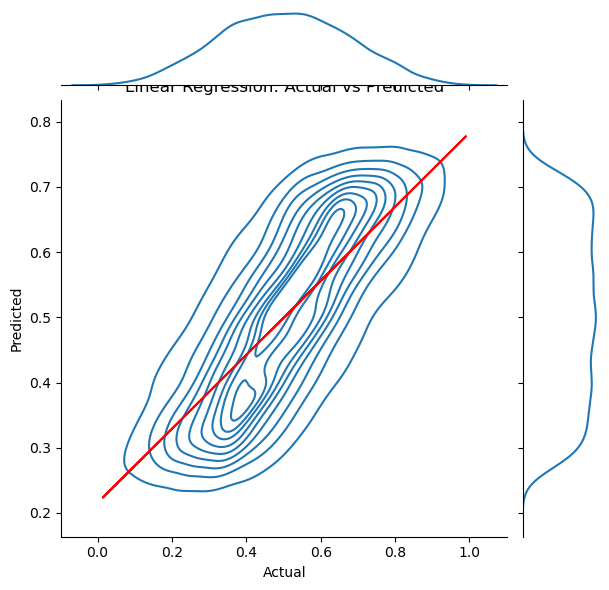

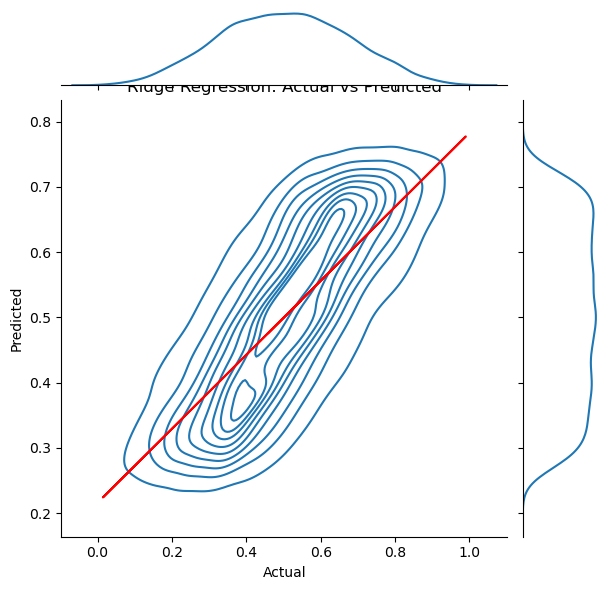

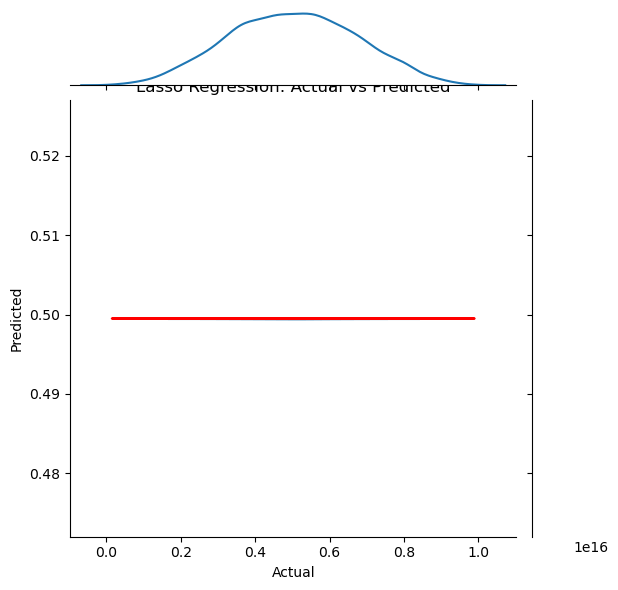

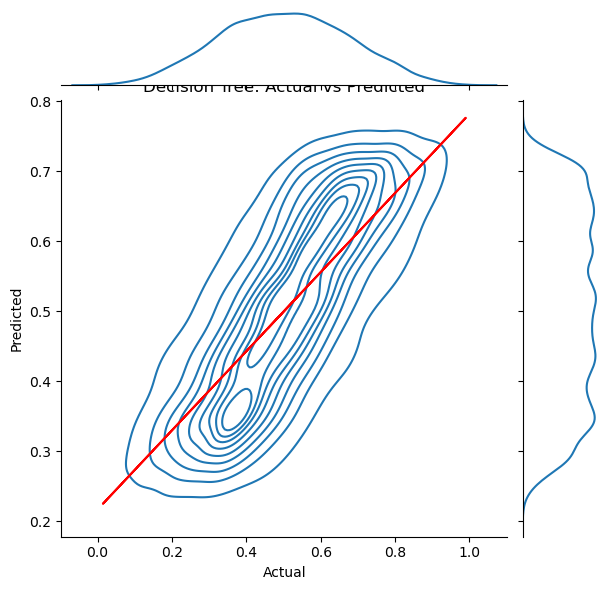

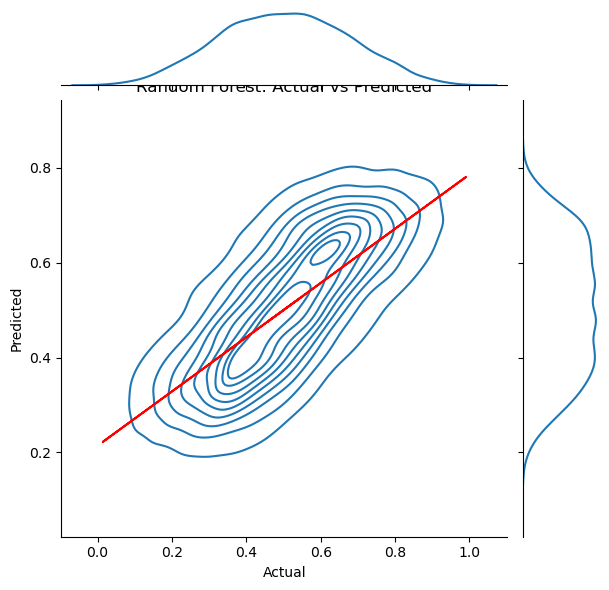

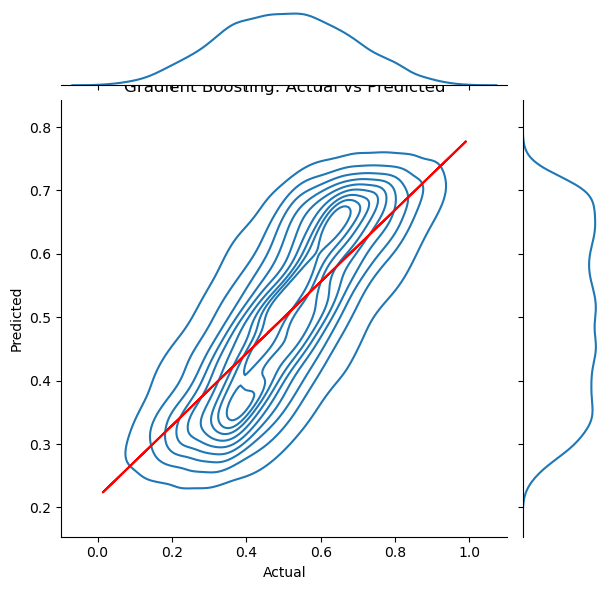

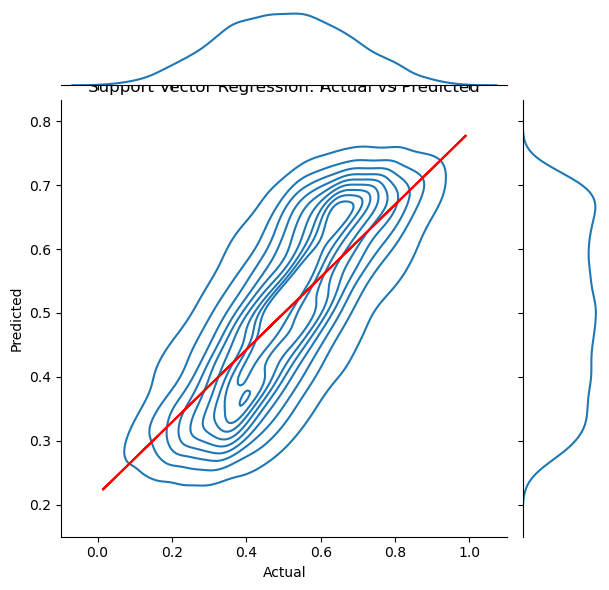

In [68]:
# Initialize results dictionary
results = {}

# Loop over models for training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model on training data
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    pct_mae = (mae / (max(y_test) - min(y_test))) * 100  # Percentage MAE

    # Store results in dictionary
    results[name] = {
        "MSE": mse, "MAE": mae, "Pct_MAE": pct_mae, "R2": r2,
    }

    # Plot actual vs predicted values with regression line
    sns.jointplot(x=y_test, y=y_pred, kind='kde', dropna=False)
    plt.plot(y_test, np.polyfit(y_test, y_pred, 1)[0] * y_test + np.polyfit(y_test, y_pred, 1)[1], color='red', label='Regression Line')
    plt.title(f"{name}: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


In [69]:
# Display performance comparison
for name, result in results.items():
    print(f"{name}: MSE={result['MSE']:.2f}, MAE={result['MAE']:.2f} ({result['Pct_MAE']:.2f}%), R^2={result['R2']:.2f}")


Linear Regression: MSE=0.01, MAE=0.09 (9.35%), R^2=0.57
Ridge Regression: MSE=0.01, MAE=0.09 (9.35%), R^2=0.57
Lasso Regression: MSE=0.03, MAE=0.14 (14.47%), R^2=-0.00
Decision Tree: MSE=0.01, MAE=0.09 (9.38%), R^2=0.56
Random Forest: MSE=0.01, MAE=0.10 (10.07%), R^2=0.50
Gradient Boosting: MSE=0.01, MAE=0.09 (9.35%), R^2=0.57
Support Vector Regression: MSE=0.01, MAE=0.09 (9.37%), R^2=0.56


Linear Regression:
MSE = 0.01
MAE = 0.09 (9.35%)
R² = 0.57
Interpretation: Linear regression shows a moderate fit to the data, with a relatively good R² value indicating that it explains about 57% of the variance in the target variable.

Ridge Regression:
MSE = 0.01
MAE = 0.09 (9.35%)
R² = 0.57
Interpretation: Ridge regression performs similarly to linear regression with nearly identical results. It also shows a moderate fit with an R² of 0.57.

Lasso Regression:
MSE = 0.03
MAE = 0.14 (14.47%)
R² = -0.00
Interpretation: Lasso regression does not perform well in this case. The negative R² suggests that the model is worse than simply using the mean of the target variable to predict, indicating poor predictive power.

Decision Tree:
MSE = 0.01
MAE = 0.09 (9.38%)
R² = 0.56
Interpretation: Decision Tree regression performs similarly to Linear and Ridge regression, with an R² of 0.56, indicating it explains just over half of the variance in the data.

Random Forest:
MSE = 0.01
MAE = 0.10 (10.04%)
R² = 0.50
Interpretation: Random Forest is performing slightly worse than the simpler models (Linear, Ridge, Decision Tree) with an R² of 0.50. This indicates it explains only half of the variance in the data, though it still performs fairly well.

Gradient Boosting:
MSE = 0.01
MAE = 0.09 (9.35%)
R² = 0.57
Interpretation: Gradient Boosting also shows an R² of 0.57, indicating that it is performing similarly to Linear and Ridge regression models.

Support Vector Regression (SVR):
MSE = 0.01
MAE = 0.09 (9.37%)
R² = 0.56
Interpretation: SVR has a performance comparable to Decision Tree and Ridge regression, with an R² of 0.56, suggesting that it explains over half of the variance in the data.

**Observations:**

MSE and MAE: The Decision Tree model has the lowest MSE and MAE, indicating that it makes the most accurate predictions on average.\
R2: The Gradient Boosting model has the highest R2, indicating that it explains the most variance in the data.\
Linear Regression, Ridge Regression, and Lasso Regression: These models have relatively high MSE and MAE, suggesting that they are not as accurate as the other models.\
Random Forest and Support Vector Regression: These models have moderate performance, with lower MSE and MAE than Linear Regression, Ridge Regression, and Lasso Regression, but not as low as Decision Tree or Gradient Boosting.\

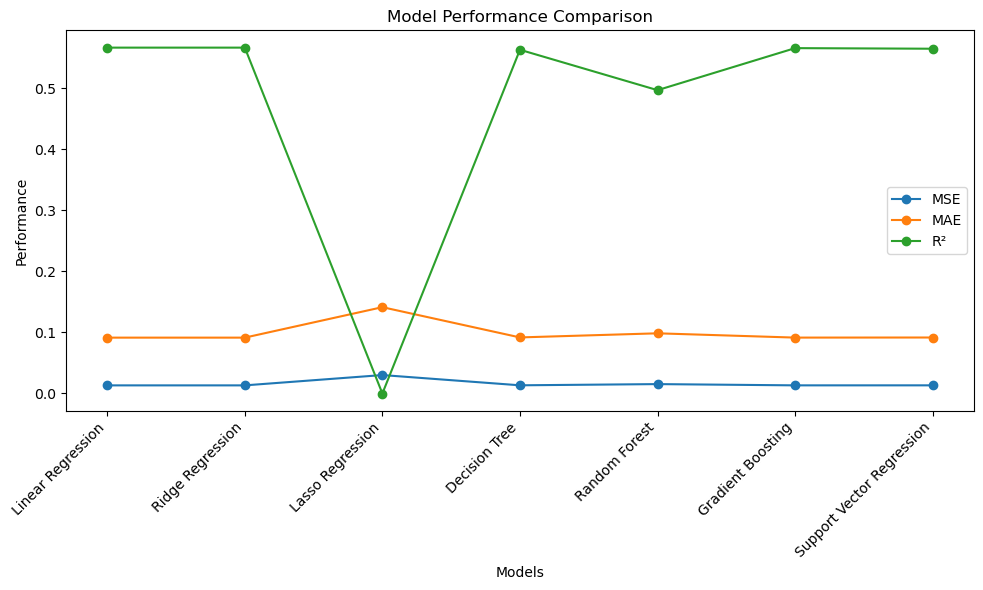

In [72]:
# Plot performance comparison across models
mse_values = [result['MSE'] for result in results.values()]
mae_values = [result['MAE'] for result in results.values()]
r2_values = [result['R2'] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.plot(model_names, mse_values, marker='o', label='MSE')
plt.plot(model_names, mae_values, marker='o', label='MAE')
plt.plot(model_names, r2_values, marker='o', label='R²')
plt.xlabel('Models')
plt.ylabel('Performance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()


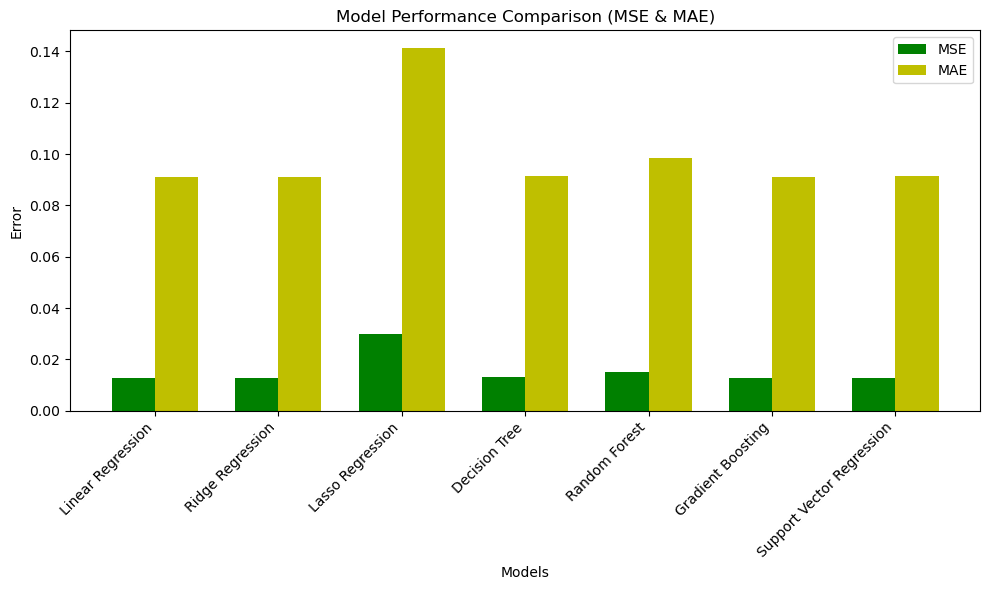

In [73]:
# Create bar chart for MSE and MAE comparison
index = np.arange(len(model_names))
plt.figure(figsize=(10, 6))
plt.bar(index, mse_values, width=0.35, label='MSE', color='g')
plt.bar(index + 0.35, mae_values, width=0.35, label='MAE', color='y')
plt.xticks(index + 0.175, model_names, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Model Performance Comparison (MSE & MAE)')
plt.legend()
plt.tight_layout()
plt.show()


Key Observations:

Best Performing Models: Linear Regression, Ridge Regression, Gradient Boosting, and Support Vector Regression, all with an R² of around 0.57, indicate the best general model performance.\
Poor Performance: Lasso Regression performs poorly with an R² of nearly 0, suggesting that it is not a suitable model for this dataset.\
Consistency: Most models show similar performance, with small variations in MSE and MAE. These models perform fairly well but don't explain a high proportion of the variance in the target variable, given that the R² values are below 0.6 for most of them.




Model Performance Comparison:
Linear Regression: MSE=0.01, MAE=0.09, (9.35%), R^2=0.57
Ridge Regression: MSE=0.01, MAE=0.09, (9.35%), R^2=0.57
Lasso Regression: MSE=0.03, MAE=0.14, (14.47%), R^2=-0.00
Decision Tree: MSE=0.01, MAE=0.09, (9.38%), R^2=0.56
Random Forest: MSE=0.01, MAE=0.10, (10.07%), R^2=0.50
Gradient Boosting: MSE=0.01, MAE=0.09, (9.35%), R^2=0.57
Support Vector Regression: MSE=0.01, MAE=0.09, (9.37%), R^2=0.56


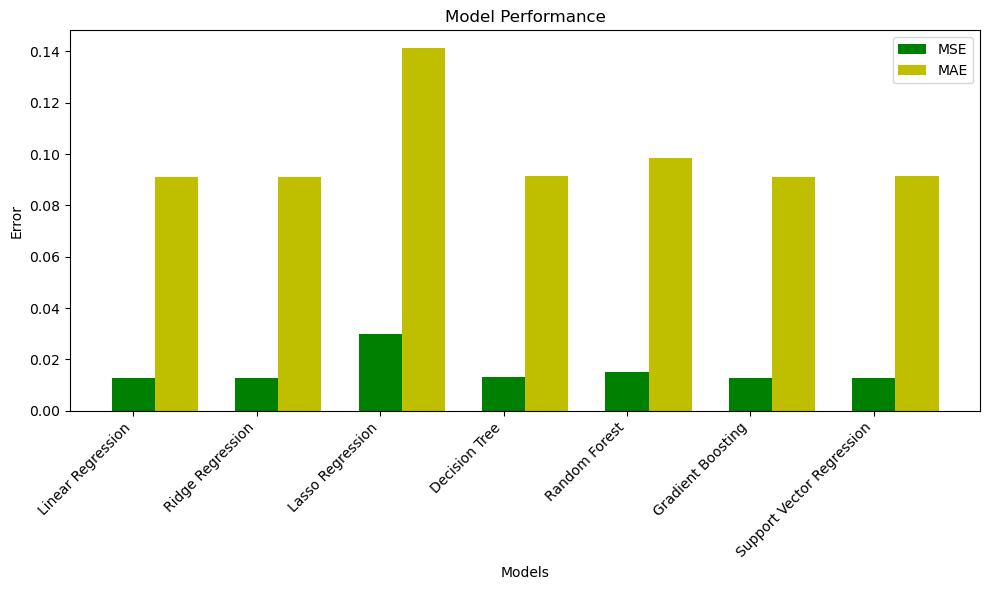

In [75]:
print("Model Performance Comparison:")
for name, result in results.items():
    print(f"{name}: MSE={result['MSE']:.2f}, MAE={result['MAE']:.2f}, ({result['Pct_MAE']:.2f}%), R^2={result['R2']:.2f}")

# Create the bar chart
index = range(len(models.keys()))  # Create x-axis labels based on model names
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(index, mse_values, label='MSE', width=0.35, color='g')
plt.bar([i + 0.35 for i in index], mae_values, label='MAE', width=0.35, color='y')  # Shift MAE bars for better visibility
plt.xlabel('Models')
plt.ylabel('Error')
plt.xticks(index, models.keys(), rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Model Performance')
plt.legend()
plt.tight_layout()
plt.show()


# Full Detailed Summary

**1. Initial Data Understanding:**

*Dataset Structure:* The dataset consists of 50,000 records and six variables.

SquareFeet: The square footage of the house.\
Bedrooms: The number of bedrooms.\
Bathrooms: The number of bathrooms.\
Neighborhood: Categorical values representing the neighborhood type (Urban, Suburban, and Rural).\
YearBuilt: The year the house was built.\
Price: The price of the house.

*Data Cleaning & Preprocessing:*

Duplicate Records: No duplicate rows or features were found in the dataset.\
Missing Values: No missing values were identified after filling them.\
Outliers: Outliers were detected both through Z-score and IQR methods, but after removing outliers, the data set became cleaner with 49,941 records.

**2. Descriptive Statistics & Visualizations:**

*Numeric Variables:*

SquareFeet: The average house size is around 2000 square feet with a spread from 1000 to 3000 square feet.\
Bedrooms: The average number of bedrooms is approximately 3.5, with a spread from 2 to 5.\
Bathrooms: The average number of bathrooms is around 2, with a spread from 1 to 3.\
YearBuilt: The average year the houses were built is around 1985, with a spread from 1950 to 2021.\
Price: The average price of houses is approximately $224,823, with a significant spread between $6,124 and $443,335.\

*Categorical Variables:*

Neighborhood: Houses are equally distributed among three categories: Suburban, Rural, and Urban, each covering about one-third of the data.

**3. Distribution Observations:**

*SquareFeet Distribution:*

The data is right-skewed, indicating that most houses are smaller in size, but a few have significantly larger square footage.

*Bedrooms & Bathrooms Distribution:*

Both show multimodal distributions with peaks at certain values (e.g., 2, 3, and 4 bedrooms and bathrooms), suggesting that these are common configurations.

*YearBuilt Distribution:*

This variable shows peaks at certain years (e.g., 1960, 1980, 1990), indicating periods of increased housing construction activity.

*Price Distribution:*
The right-skewed distribution of prices suggests that while most houses are priced lower, a few are significantly more expensive.

**4. Correlations Between Variables:**

*SquareFeet vs. Bedrooms & Bathrooms:*

Positive correlation: Larger houses tend to have more bedrooms and bathrooms. This is expected as more space generally allows for more rooms.
YearBuilt vs. Other Variables:

No strong correlation with square footage, number of bedrooms, or bathrooms, indicating that the year a house was built does not significantly influence these features.

*Price vs. Other Variables:*

Strong positive correlation with square footage, number of bedrooms, and bathrooms. Larger houses with more bedrooms and bathrooms are generally more expensive.

**5. Impact of Neighborhood on Relationships:**

*Urban vs. Suburban vs. Rural:*

Urban neighborhoods tend to have larger houses with more bedrooms and bathrooms, reflected in the plots. Urban neighborhoods also tend to have higher average prices, likely due to higher demand and property value in urban areas.

**6. Regression Model Performance:**

*Evaluation Metrics:*

Various regression models (Linear, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, Support Vector Regression) were evaluated based on metrics:\
MSE (Mean Squared Error): Represents the average of the squared differences between predicted and actual values. A lower value indicates better performance.\
MAE (Mean Absolute Error): Represents the average absolute differences between predictions and actual values. A lower MAE indicates better model accuracy.\
R² (R-squared): Represents the proportion of the variance in the dependent variable (Price) explained by the model. A value closer to 1 indicates a better fit.

*Key Results:*

Linear Regression, Ridge Regression, Gradient Boosting, and Support Vector Regression had strong performance, with an R² around 0.57, indicating they explained 57% of the variance in price.

Lasso Regression performed poorly with an R² of -0.00, suggesting severe underfitting.

Decision Tree had similar performance to Linear and Ridge models, with R² = 0.56, but with a higher risk of overfitting.

**7. Model Performance Visual Analysis:**

*Linear Regression, Decision Tree, Gradient Boosting, and Support Vector Regression:*

These models performed well, with predictions clustering closely around the diagonal line in the plot, indicating accurate predictions.

*Lasso Regression:*
The model showed underfitting, with all predictions clustered around a single value, not capturing the variability in the data.

*Model Bias and Variance:*

Bias: Some models may show a slight tendency to underpredict or overpredict, seen in the spread of points above or below the diagonal line.

Variance: A wider spread of points around the diagonal indicates higher variance (less consistent predictions). Decision Trees may show more variance due to overfitting, while Linear Regression shows less spread.

**8. Final Observations on Correlation and Model Fit:**

*Positive Correlations:*\
SquareFeet and Price: Strong positive correlation (0.8) suggests that larger houses are more expensive.\
Bedrooms and Price: Weak positive correlation (0.1) indicates houses with more bedrooms are somewhat more expensive but not a strong predictor.\
Bathrooms and Price: Very weak negative correlation, suggesting the number of bathrooms does not significantly affect price.

*No Significant Negative Correlations:*

No other variables exhibit strong negative relationships.

*No Correlation for YearBuilt:*

YearBuilt has minimal impact on price, square footage, or number of rooms, suggesting that the age of the house is not a significant predictor in this dataset.